# Método de euler para ecuaciones diferenciales.

El método de Euler es un procedimiento numérico simple para resolver ecuaciones diferenciales ordinarias (EDOs) con un valor inicial dado. Es un método iterativo que comienza en un punto conocido y avanza paso a paso hasta llegar al punto deseado, utilizando la pendiente de la solución (es decir, la derivada) para avanzar en cada paso.


En este capítulo se enfoca la solución de ecuaciones diferenciales ordinarias de la forma:

$$
\frac{dy}{dx} = f(x,y)
$$

en términos matemáticos calculabamos el siguiente de la forma:

$$
y_{i+1} = y_i + mh
$$

Donde m es la pendiente estimada que se usa para extrapolar desde un valor anterior $y_i$ a un nuevo valor $y_{i+1}$ en una distancia $h$. Este valor se usa paso a paso para calcular un valor posterior y trazar la trayectoria de la solución. Normalmente, la pendiente representa la derivada de la función en el punto $y_i$

<img src="https://github.com/BioAITeamLearning/Metodos_2023_03_UAM/blob/main/_static/images/Euler.png?raw=true"/>
<img src="https://github.com/BioAITeamLearning/Metodos_2023_03_UAM/blob/main/_static/images/Euler2.png?raw=true"/>

## Algoritmo de Euler para la integración


1. Hacer $y_{i+1} = y_i + hf'(x_i,y_i)$
2. Hacer $x_{i} = x_{i+1}$

## Ejercicio:

Hallar la integral geométrica de la función $y' = 2t$ con una condicion incial y(0)=0 y un tiempo de integración de $0$ hasta $0.6$ y un paso de integración de $0.1$

In [1]:
# Definimos la función
import sympy as sp
import numpy as np
import pandas as pd

t = sp.symbols('t')
dy = 2*t

y0 = 0 # Condicion inicial
ti = 0 # Tiempo inicial
h = 0.1 # paso de integración
tf = 0.6 # Tiempo final


# Definimos los vectores donde almacenaremos el resultado.
x = np.arange(ti, tf + h, h)
y = np.empty_like(x)
y[0] = y0
print(x)
print(y)


[0.  0.1 0.2 0.3 0.4 0.5 0.6]
[0.00000000e+000 1.68821824e+195 2.51313104e+180 4.44032494e+252
 5.40026746e-310 0.00000000e+000 0.00000000e+000]


In [2]:
columnas = ['it','t','yi','yi+1']
tabla = pd.DataFrame(columns=columnas)
for i in range(0,len(y)-1):
  y[i+1] = y[i] + h * dy.subs({t:x[i]})
  nueva_fila = pd.DataFrame(data={'it':[i+1],'t':[round(x[i],2)],'yi':[round(y[i],2)],"yi+1":[round(y[i+1],2)]})
  tabla = pd.concat([tabla,nueva_fila], ignore_index=True)

tabla.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_9580\3804453467.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla = pd.concat([tabla,nueva_fila], ignore_index=True)


,it,t,yi,yi+1
0,1,0.0,0.00,0.00
1,2,0.1,0.00,0.02
2,3,0.2,0.02,0.06
3,4,0.3,0.06,0.12
4,5,0.4,0.12,0.20


<Figure size 432x288 with 0 Axes>

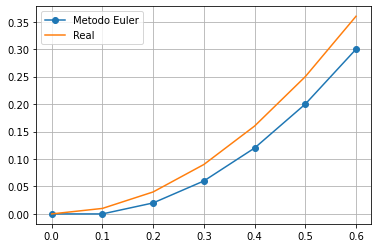

In [3]:
import matplotlib.pyplot as plt
plt.figure()
fig, ax = plt.subplots()
ax.grid()
ax.plot(x,y, marker='o', label ="Metodo Euler")
ax.plot(x, x**2, label="Real")
ax.legend()

### Circuito RLC: Análisis analítico.

Vamos a deducir el modelo del siguiente circuito:

$\begin{array}{l}
\frac{{di}}{{dt}} =  - \frac{R}{L}i(t) - \frac{1}{L}v(t) + \frac{1}{L}vi\\
\frac{{dv}}{{dt}} = \frac{1}{C}i(t)
\end{array}$

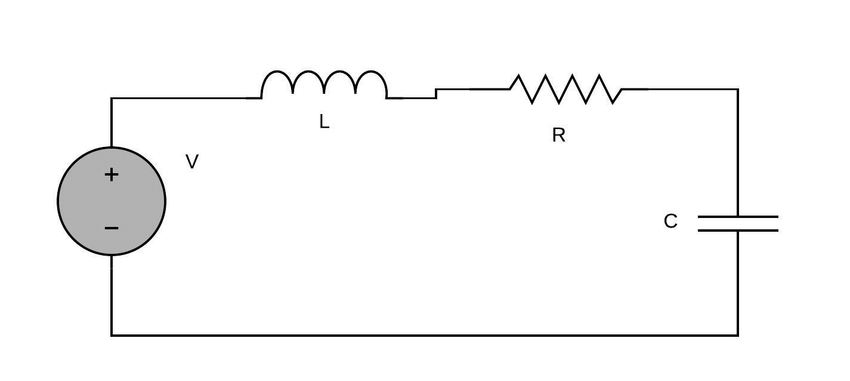

Definamos las ecuaciones del sistema en `sympy`

In [4]:
from sympy import *

t, vi, L, R, C = symbols("t vi L R C")
C1,C2 = symbols("C1 C2")
v = Function("v")(t)
i = Function("i")(t)

didt=i.diff(t)
dvdt=v.diff(t)
expr1 = Eq(didt, (1/L)*vi-(R/L)*i-(1/L)*v)
expr1

Eq(Derivative(i(t), t), -R*i(t)/L + vi/L - v(t)/L)

In [5]:
# Asumimos valores de R,L y C = 1

expr1=expr1.subs(L, 1).subs(R,1).subs(C,1).subs(vi,1)
expr1

Eq(Derivative(i(t), t), -i(t) - v(t) + 1)

In [6]:
expr2 = Eq(dvdt, (1/C)*i)
expr2

Eq(Derivative(v(t), t), i(t)/C)

In [7]:
# Asumimos valores de R,L y C = 1

expr2=expr2.subs(L,1).subs(R,1).subs(C,1).subs(vi,1)
expr2

Eq(Derivative(v(t), t), i(t))

In [8]:
init_printing(use_latex=True)
s=dsolve([expr1,expr2])
s

In [9]:
# Vamos a hallar los valores de las ctes C1 y C2
eq1 = Eq(s[0].rhs.subs({t:0}).evalf(), 0.1)
eq2 = Eq(s[1].rhs.subs({t:0}).evalf(), 0.1)
sol = solve([eq1,eq2], [C1,C2])
print(sol)

{C1: -0.900000000000000, C2: 0.404145188432738}


In [10]:
eq1

In [11]:
s[0].rhs

In [12]:
## Generemos dos funciones que permitan reemplazar los valores de t dados para graficar las soluciones.

e1 = lambdify(t,s[0].rhs.subs(sol),'numpy')
e2 = lambdify(t,s[1].rhs.subs(sol),'numpy')

In [13]:
t_vals = np.linspace(0,10,100)

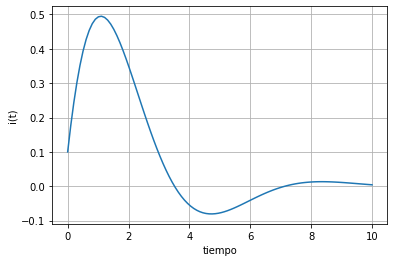

In [14]:
plt.plot(t_vals, e1(t_vals))
plt.xlabel('tiempo')
plt.ylabel('i(t)')
plt.grid(True)

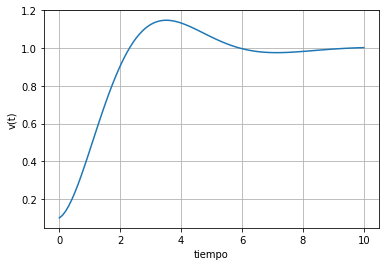

In [15]:
plt.plot(t_vals, e2(t_vals))
plt.xlabel('tiempo')
plt.ylabel('v(t)')
plt.grid(True)

las gráficas para la corriente $i(t)$ y el voltaje $v(t)$ en función del tiempo para el circuito RLC analizado. Como puedes ver, ambas funciones muestran un comportamiento oscilatorio amortiguado, que es típico en este tipo de circuitos.

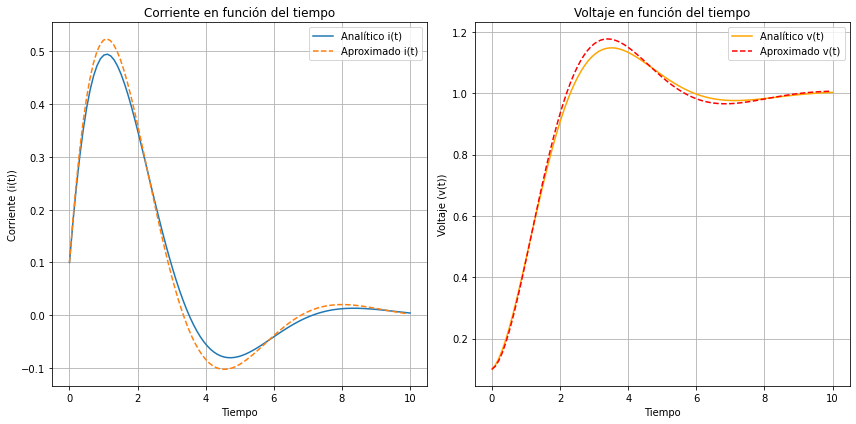

In [16]:
def euler_method_system(funcs, y0, t_range, dt):
    """
    Método de Euler para un sistema de ecuaciones diferenciales.

    :param funcs: Lista de funciones que representan el sistema de ecuaciones diferenciales.
    :param y0: Condiciones iniciales para cada variable en el sistema.
    :param t_range: Rango de tiempo como una tupla (inicio, fin).
    :param dt: Paso de tiempo.
    :return: Tupla de listas (tiempos, valores de cada variable).
    """
    t_values = np.arange(t_range[0], t_range[1], dt)
    y_values = [np.array(y0)]

    for t in t_values[:-1]:
        y_current = y_values[-1]
        y_next = y_current + dt * np.array([f(*y_current, t) for f in funcs])
        y_values.append(y_next)

    return t_values, np.array(y_values).T

# Funciones para el sistema de ecuaciones diferenciales
def func_i(i, v, t):
    return 1 - i - v

def func_v(i, v, t):
    return i

# Paso de tiempo para el Método de Euler
dt = 0.1

# Condiciones iniciales y rango de tiempo
initial_i = 0.1
initial_v = 0.1
time_range = (0, 10)

# Condiciones iniciales para i y v
initial_conditions = [initial_i, initial_v]

# Solución aproximada para i(t) y v(t) usando el Método de Euler para sistemas
t_values_euler, [i_values_euler_system, v_values_euler_system] = euler_method_system(
    [func_i, func_v], initial_conditions, time_range, dt
)

# Graficando soluciones analíticas y aproximadas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_vals, e1(t_vals), label='Analítico i(t)')
plt.plot(t_values_euler, i_values_euler_system, label='Aproximado i(t)', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Corriente (i(t))')
plt.title('Corriente en función del tiempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_vals, e2(t_vals), label='Analítico v(t)', color='orange')
plt.plot(t_values_euler, v_values_euler_system, label='Aproximado v(t)', linestyle='--', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje (v(t))')
plt.title('Voltaje en función del tiempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Actividad:

Ajustar el código para que, dado un sistema de ecuaciones diferenciales, pueda calcular la solución del mismo dadas unas condiciones iniciales y un paso con el método de euler.